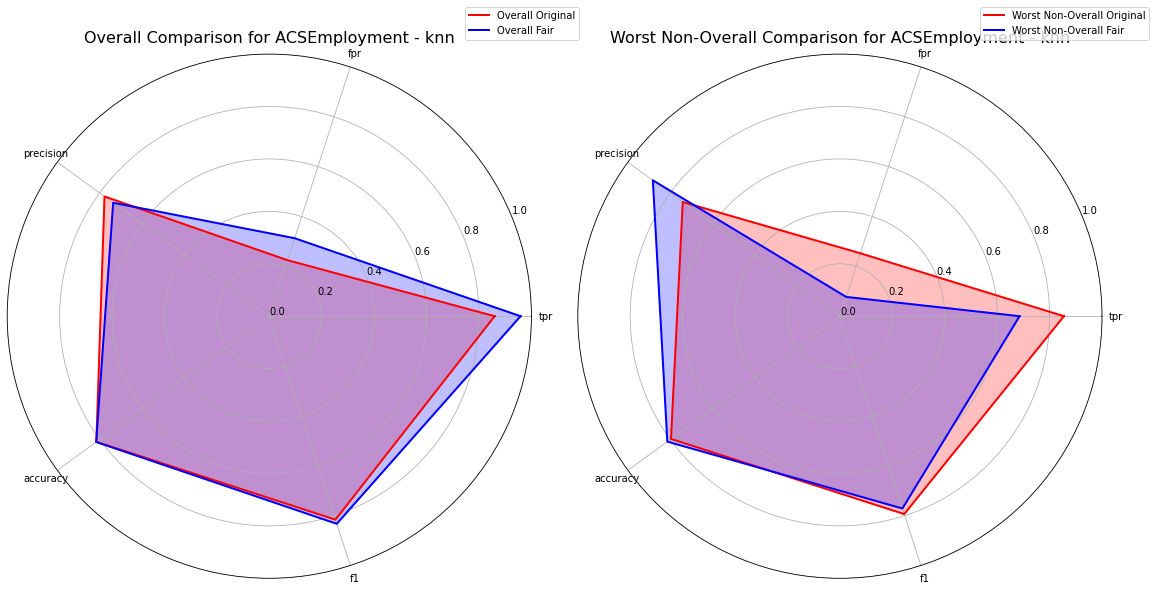

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def create_comparative_spider_plots(df, dataset, classifier, metrics_dict):
    def get_model_row(df, best=True):
        if best:
            return df.loc[df['f1'].idxmax()]
        return df.loc[df['f1'].idxmin()]

    overall_original = df[(df['dataset'] == dataset) & 
                          (df['classifier'] == classifier) & 
                          (df['dataset_subset'] == 'overall') & 
                          (df['method'] == 'original')]
    overall_fair = df[(df['dataset'] == dataset) & 
                      (df['classifier'] == classifier) & 
                      (df['dataset_subset'] == 'overall') & 
                      (df['method'] == 'fair')]

    non_overall_original = df[(df['dataset'] == dataset) & 
                              (df['classifier'] == classifier) & 
                              (df['dataset_subset'] != 'overall') & 
                              (df['method'] == 'original')]
    non_overall_fair = df[(df['dataset'] == dataset) & 
                          (df['classifier'] == classifier) & 
                          (df['dataset_subset'] != 'overall') & 
                          (df['method'] == 'fair')]

    best_overall_original = get_model_row(overall_original, best=True)
    best_overall_fair = get_model_row(overall_fair, best=True)
    worst_non_overall_original = get_model_row(non_overall_original, best=False)
    worst_non_overall_fair = get_model_row(non_overall_fair, best=False)

    fig, axs = plt.subplots(1, 2, figsize=(16, 8), subplot_kw=dict(polar=True))

    def plot_model(ax, model_row, color, label):
        labels = np.array(list(metrics_dict.keys()))
        stats = model_row[list(metrics_dict.values())].values
        angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
        stats = np.concatenate((stats, [stats[0]]))
        angles += angles[:1]

        ax.fill(angles, stats, color=color, alpha=0.25)
        ax.plot(angles, stats, color=color, linewidth=2, label=label)
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(labels)
        ax.set_yticks(np.linspace(0, 1, 6))  # Scale from 0 to 1
        ax.set_yticklabels([f"{i:.1f}" for i in np.linspace(0, 1, 6)])

    plot_model(axs[0], best_overall_original, 'red', 'Overall Original')
    plot_model(axs[0], best_overall_fair, 'blue', 'Overall Fair')
    axs[0].legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    axs[0].set_title(f"Overall Comparison for {dataset} - {classifier}", size=16)

    plot_model(axs[1], worst_non_overall_original, 'red', 'Worst Non-Overall Original')
    plot_model(axs[1], worst_non_overall_fair, 'blue', 'Worst Non-Overall Fair')
    axs[1].legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    axs[1].set_title(f"Worst Non-Overall Comparison for {dataset} - {classifier}", size=16)

    return fig, axs

metrics_dict = {
    'tpr': 'tpr',
    'fpr': 'fpr',
    'precision': 'precision',
    'accuracy': 'accuracy',
    'f1': 'f1'
}

# load all_results dataframe from pickle
all_results = pd.read_pickle('all_results.pkl')

fig, axs = create_comparative_spider_plots(all_results, 'ACSEmployment', 'knn', metrics_dict)
plt.tight_layout()
plt.show()
